In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [96]:
df = pd.read_csv('dataset_buys _comp.csv')  

In [97]:
print("Kolom-kolom dalam dataset:", df.columns)
print(df.head())

Kolom-kolom dalam dataset: Index(['Age', 'Income', 'Student', 'Credit_Rating', 'Buys_Computer'], dtype='object')
          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1


In [98]:
df.isnull().sum()

Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64

In [99]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [100]:
print(df.columns)


Index(['Age', 'Income', 'Student', 'Credit_Rating', 'Buys_Computer'], dtype='object')


In [101]:
target_col = 'Buys_Computer'  
x = df.drop(target_col, axis=1)
y = df[target_col]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [104]:
y_pred = model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAkurasi:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 28  43]
 [  9 120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.39      0.52        71
           1       0.74      0.93      0.82       129

    accuracy                           0.74       200
   macro avg       0.75      0.66      0.67       200
weighted avg       0.74      0.74      0.71       200


Akurasi: 0.74


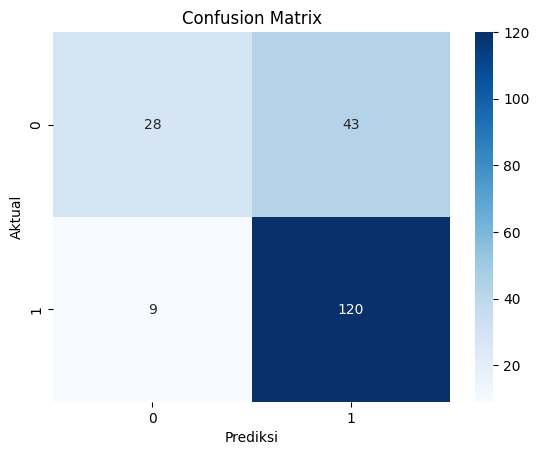

In [105]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()